In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

    Lectura de CSV y Almacenamiento en DataFrame con Pandas

In [7]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/air_pollution new.csv' , sep = ';')

Exploración de datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     6985 non-null   object
 1   country  6985 non-null   object
 2   2017     6985 non-null   object
 3   2018     6985 non-null   object
 4   2019     6985 non-null   object
 5   2020     6985 non-null   object
 6   2021     6985 non-null   object
 7   2022     6985 non-null   object
 8   2023     6985 non-null   object
dtypes: object(9)
memory usage: 491.3+ KB


Vizualisar las primeras filas del dataframe con pandas

In [4]:
df.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0,0,0,16,12.5,14.5,14.4
2,Algiers,Algeria,0,0,21.2,20.2,20,17.8,17.4
3,Ordino,Andorra,0,0,0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0,0,15.9,13,11,8.8,8.7


Vizualisar las ultimas filas del dataframe con pandas

In [9]:
df.tail()

,city,country,2017,2018,2019,2020,2021,2022,2023
6980,Thanh Pho Lang Son,Vietnam,0,0,0,0,36.8,14.6,15
6981,Thu Duc,Vietnam,0,0,0,0,20.1,24.5,24.5
6982,Tra Vinh,Vietnam,0,0,0,0,6.2,5.5,5.5
6983,Trang Bang,Vietnam,0,0,0,0,0,12.9,12.4
6984,Lusaka,Zambia,0,0,0,0,24.6,24.6,24.4


CAMBIAR LOS DATOS A FLOAT DESDE EL 207 AL 2023

In [10]:
columna_años = ['2017','2018','2019','2020','2021','2022','2023']
df[columna_años] = df[columna_años].apply(pd.to_numeric, errors = 'coerce',).fillna(0).astype(float)

Pregunta 1: ¿Cuál es el promedio de contaminación del aire en 2021?

In [11]:
promedio_2021 = df['2021'].mean()
print(promedio_2021)

12.437372226198997


Pregunta 2: ¿Cuántas ciudades únicas hay en el dataset?

In [12]:
ciudades_unicas = df['city'].nunique()
print(ciudades_unicas)

6852


Pregunta 3: ¿Cómo ha evolucionado la contaminación promedio anual desde 2017 hasta 2023?

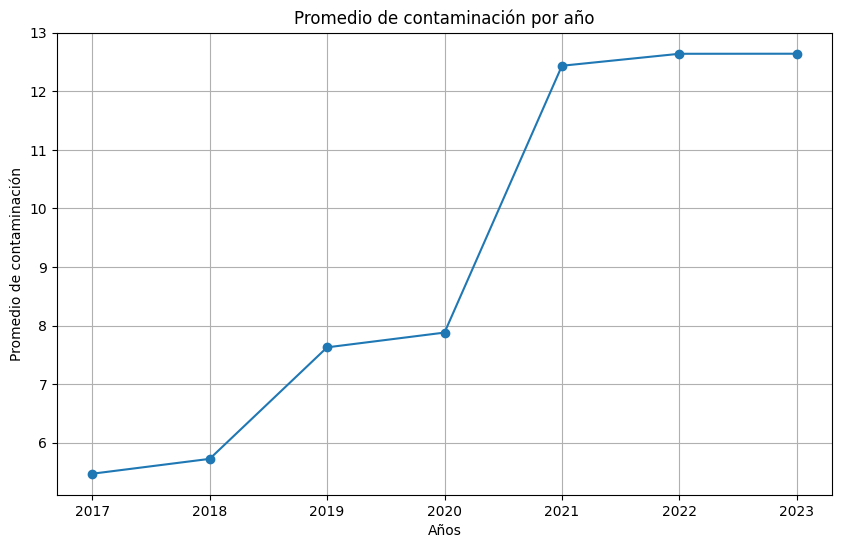

In [13]:
promedio_años = df[columna_años].mean()
plt.figure(figsize = (10,6))
plt.plot(promedio_años , marker = 'o')
plt.xlabel('Años')
plt.ylabel('Promedio de contaminación')
plt.title('Promedio de contaminación por año')
plt.grid(True)
plt.show()

Pregunta 4 Vizualizar las 10 ciudades más contaminadas en el año 2023 :

C:\Users\FRANK\AppData\Local\Temp\ipykernel_9828\2987555674.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




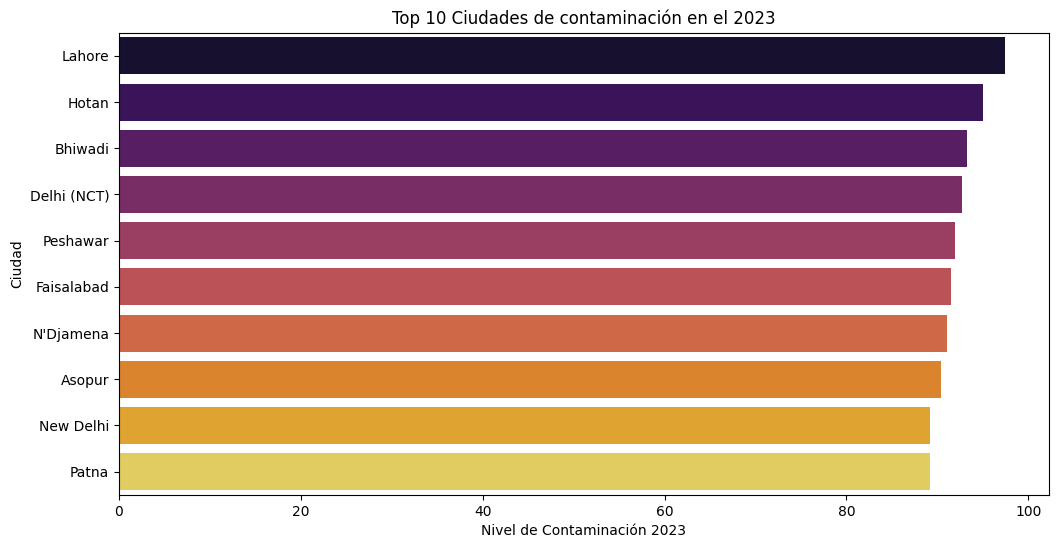

In [14]:
top_ciudades_contaminadas = df.sort_values(by ='2023', ascending=False).head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = '2023' , y = 'city' , data = top_ciudades_contaminadas , palette = 'inferno')
plt.xlabel('Nivel de Contaminación 2023')
plt.ylabel('Ciudad')
plt.title('Top 10 Ciudades de contaminación en el 2023')
plt.show()

Pregunta 5 Realizar un diagrama de correlación

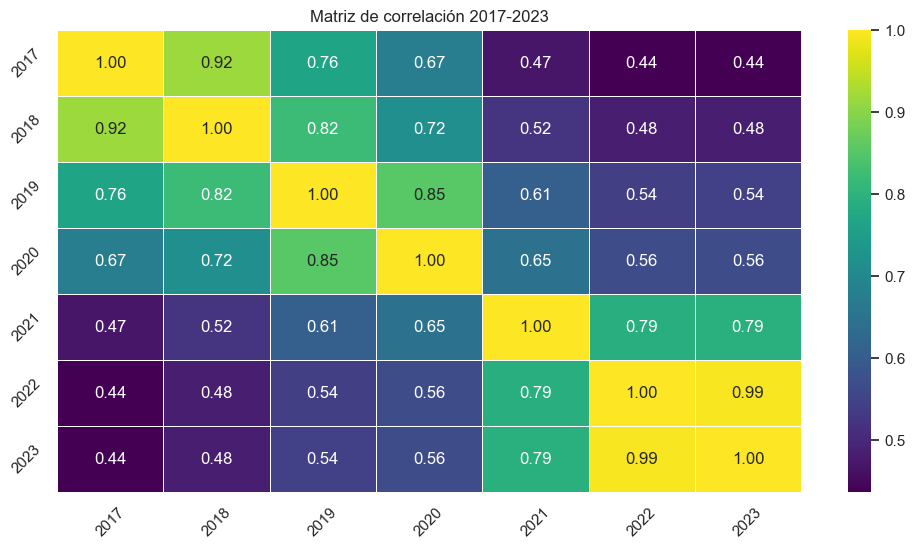

In [15]:
matriz_corr = df[columna_años].corr()
plt.figure(figsize = (12,6))
sns.set(style = 'white')
sns.heatmap(matriz_corr , annot = True , cmap='viridis' , linewidths=0.5 , fmt='.2f')
plt.title('Matriz de correlación 2017-2023')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

6. Comparar los niveles de contaminación de diferentes ciudades en un año específico

C:\Users\FRANK\AppData\Local\Temp\ipykernel_9828\1822568895.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




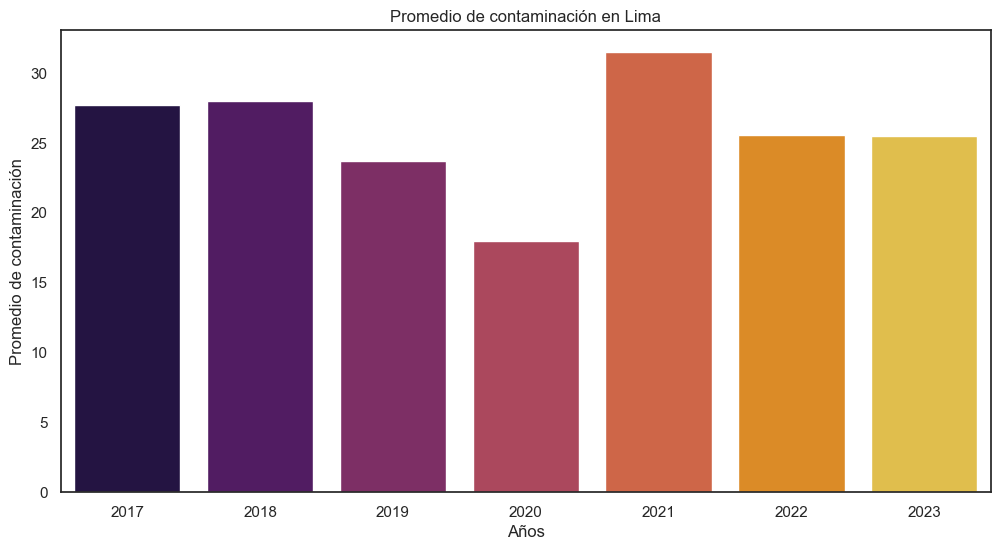

In [16]:
lima = df[df['city'] == 'Lima']
promedio_años_lima = lima[columna_años].mean()
años = columna_años
valores = promedio_años_lima.values

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.barplot(x = años , y = valores , palette = 'inferno')
plt.xlabel('Años')
plt.ylabel('Promedio de contaminación')
plt.title('Promedio de contaminación en Lima')
plt.show()

7. Realizar un mapa de calor

In [30]:
import plotly.express as px
import pycountry
import plotly.io as pio
pio.renderers.default = 'browser'
import numpy as np

In [28]:
def get_iso_alpha_3(country):
    try:
        return pycountry.countries.get(name=country).alpha_3
    except:
        return np.nan
    
df['iso_alpha_3'] = df['country'].apply(get_iso_alpha_3)
columna_años = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
df_promedio_pais = df.groupby(['iso_alpha_3'])[columna_años].mean().reset_index()
for year in columna_años:
    mapa_contaminacion = px.choropleth(df_promedio_pais, locations='iso_alpha_3',
                                       color=year, hover_name='iso_alpha_3',
                                       color_continuous_scale=px.colors.sequential.Plasma)
    mapa_contaminacion.update_layout(title_text=f"Nivel de Contaminación en {year}")
    mapa_contaminacion.show()